In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


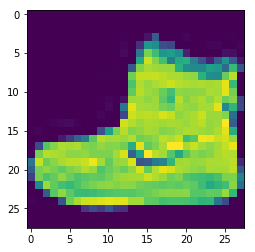

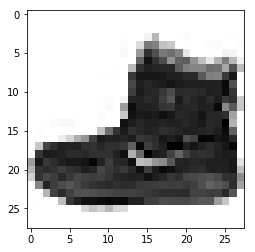

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# normalize dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

# show a picture example
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [3]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu', input_dim=784))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
# learning_rate = 0.01
# sgd = keras.optimizers.SGD(learning_rate) # stochastic gradiend descent

# model.compile(optimizer=sgd, 
#               loss='sparse_categorical_crossentropy', # for "non one-hot encoded" classification
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.4898 - acc: 0.8238
Epoch 2/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.3630 - acc: 0.8670
Epoch 3/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.3286 - acc: 0.8794
Epoch 4/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.3060 - acc: 0.8867
Epoch 5/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.2873 - acc: 0.8938
Epoch 6/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2745 - acc: 0.8982
Epoch 7/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2607 - acc: 0.9019
Epoch 8/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2501 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2411 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2320 - acc: 

In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 32us/step
0.36611393861174585 0.8654


In [7]:
# checking our neural network for prediction

predictions = model.predict(x_test)
np.set_printoptions(suppress=True)

# generate random number for choosing random clothes
from random import randint
clothes_index = randint(0, 9999)
print(predictions[clothes_index])

[0.02063893 0.00000504 0.2306107  0.00050421 0.4315568  0.00000012
 0.31624797 0.00000016 0.00043555 0.00000047]


In [8]:
prediction_num = np.argmax(predictions[clothes_index])
print("Model predicted: %s" % class_names[prediction_num])

Model predicted: Coat


And in the picture was:


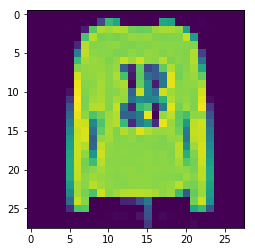

In [9]:
print("And in the picture was:")
plt.imshow(x_test[clothes_index])
plt.show()